<a href="https://colab.research.google.com/github/mpedraza98/DSPS_MPedraza/blob/main/CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")

from scipy import optimize

Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which *population* mean to give it (it will be the same for each distribution)

In [3]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](https://raw.githubusercontent.com/fedhere/DSPS_2019/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_2019/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [4]:
# the chi sq distribution takes the number of degrees of freedom, 
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution of 100 elements

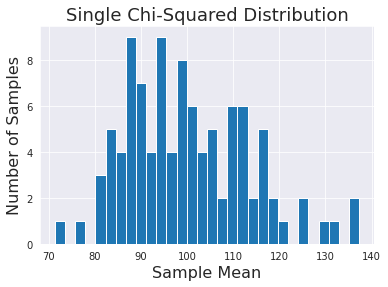

In [5]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
md = {}
# mydists is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
md['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(md['chisq'][100], bins = 30)
pl.title('Single Chi-Squared Distribution', fontsize=18)
pl.ylabel('Number of Samples',fontsize=16)
pl.xlabel('Sample Mean',fontsize=16);

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom. Showing a slightly left-skewed Gaussian looking distribution.

## let numpy calculate what the mean and stdev of this distribution are

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'][100].mean(), md['chisq'][100].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes 

In [7]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100)))
#mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


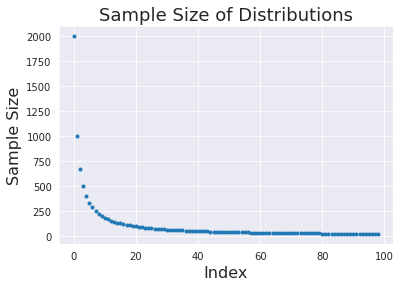

In [8]:
pl.plot(mysize, '.')
pl.title('Sample Size of Distributions', fontsize=18)
pl.xlabel("Index", fontsize = 16)
pl.ylabel("Sample Size", fontsize=16);

#Figure 2: Sample size of the 100 distributions used in the rest of this assignment.

Text(1259.3999999999999, 100, 'expected mean')

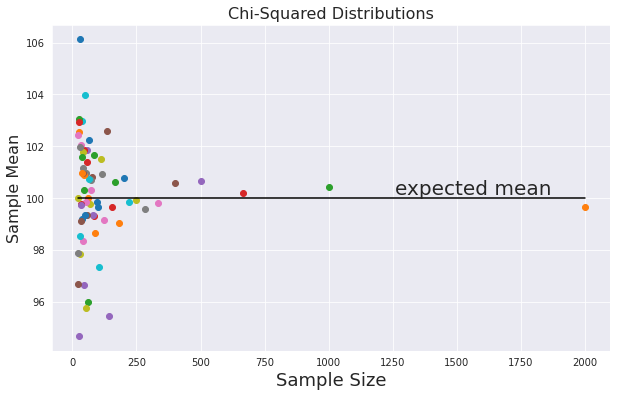

In [9]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100
    
# save the means for plotting later    

md['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('Sample Size', fontsize=18)
        axchisq_mu_n.set_ylabel('Sample Mean', fontsize=16)
axchisq_mu_n.set_title('Chi-Squared Distributions', fontsize=16)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)


#Figure 3: In this figure, we can see that when the sample size is smaller, there is a much wider spread of means. When the sample size increases above 200, the means are substantially closer to the expected mean. The narrowing of sample means towards the expected mean as sample size increases confirms the law of large numbers, which states that the sample means tends toward the population mean as the sample mean approaches infinity. 

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0, 0.5, 'Number of Samples')

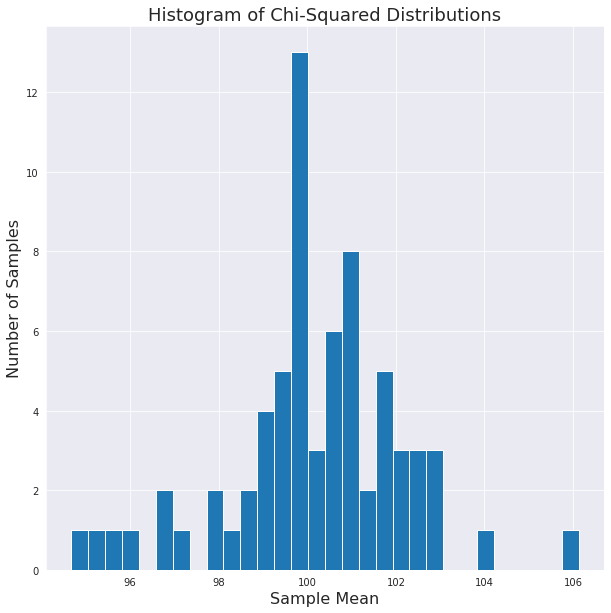

In [10]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Histogram of Chi-Squared Distributions',fontsize=18)
pl.xlabel('Sample Mean', fontsize = 16)
pl.ylabel('Number of Samples', fontsize = 16)

## Figure 4: Histogram of 100 Chi-squared distributions of sample sizes varying from 10-2000. (Gaussian fit shown in later figures), although a general Gaussian shape can be observed.

Now, let's define a dictionary to store the distributions

In [11]:
dist = ['pois', 'normal', 'chisq', 'gamma', 'binomial']

In [12]:
mydist={}
for i in dist:
  mydist[i]={}

Let's use the same distribution for sizes since it provides plenty of values for small samples. Now, let's generate the samples for each distribution

In [13]:
#Creating all the distributions with sizes i
for i in mysize:
  #Normal distribution with standar deviation of 1
  mydist['normal'][i] = np.random.normal(mymean, size = i)
  
  #Binomial distribution with p=0.34 and n=mymean/p
  #This choice of n is based on the fact that n*p = mean
  mydist['binomial'][i] = np.random.binomial(mymean/0.34, 0.34, size = i)

  #Poisson distribution with lambda = mymean
  mydist['pois'][i] = np.random.poisson(mymean, size = i)

  #Gamma distribution
  mydist['gamma'][i] = np.random.gamma(mymean, size = i)

#Create a new disctionary to store all means
means = {}

In [14]:
#Lets define the gaussian function for the linear fit
def gaussian(x, a, mu, sigma):
  ''' Returns the gaussian for a given point x with parameters a, mu, sigma '''
  return a*np.exp(-(x-mu)**2/(2*sigma**2))

# Do it for the Normal distribution

Text(1259.3999999999999, 100, 'expected mean')

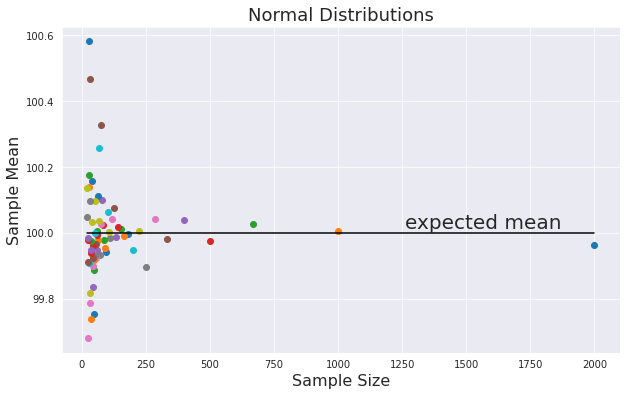

In [15]:
#Create the axes for the plot
ax_normal_limit = pl.figure(figsize = (10, 6)).add_subplot(111)
means['normal'] = {}

for i in mydist['normal']:
  temp = mydist['normal'][i].mean()
  means['normal'][i] = temp
  ax_normal_limit.plot(i,temp, 'o')

ax_normal_limit.set_xlabel('Sample Size', fontsize=16)
ax_normal_limit.set_ylabel('Sample Mean', fontsize=16)
ax_normal_limit.set_title('Normal Distributions', fontsize=18)
ax_normal_limit.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
ax_normal_limit.text(ax_normal_limit.get_xlim()[1] * .6, 100, "expected mean", va="bottom", fontsize=20)

#Figure 5: In similar fashion to Figure 3, this plot demonstrates that for small sample sizes, the sample mean strongly fluctuates around the population mean. As the sample size increases, these fluctuations become smaller everytime. However, the fluctuations around the population mean are signifigantly smaller than those produced by the chi-squared distributions.

**Now, let's see the histogram of all means for the Normal Distribution**


We will add a gaussian fit for the curve

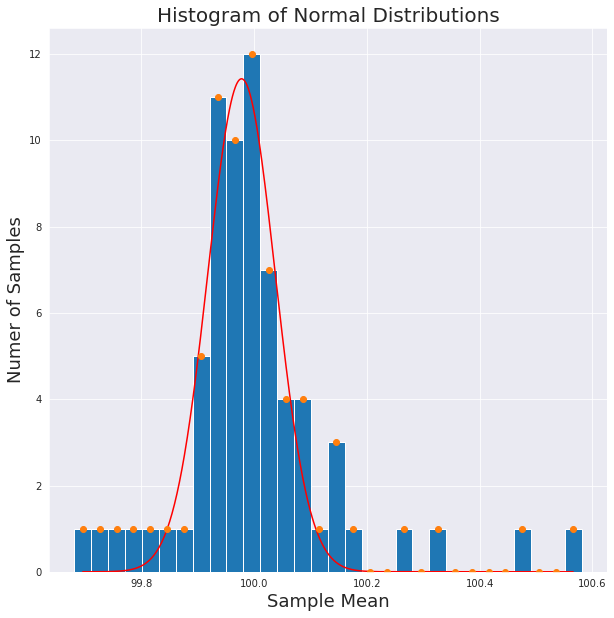

In [16]:
normal_means = list(means['normal'].values())

ax_hist_normal = pl.figure(figsize = (10, 10)).add_subplot(111)
norm_hist = ax_hist_normal.hist(normal_means,bins=30)
ax_hist_normal.set_xlabel('Sample Mean', fontsize = 18)
ax_hist_normal.set_ylabel('Numer of Samples', fontsize = 18)
ax_hist_normal.set_title('Histogram of Normal Distributions', fontsize=20)

#let's find the center of each bin
#since we have a small amount of bins, lets do it using a for cycle
x_norm_fit = np.zeros(norm_hist[1].size-1)
for i in np.arange(0,norm_hist[1].size-1):
  x_norm_fit[i] = (norm_hist[1][i]+norm_hist[1][i+1])/2

#Fittign the gaussian curve
a, b = optimize.curve_fit(gaussian, x_norm_fit, norm_hist[0], p0 = [10,110,4])
x_norm = np.linspace(max(x_norm_fit),min(x_norm_fit),1000)
y_norm_fit = gaussian(x_norm, a[0], a[1], a[2])

ax_hist_normal.plot(x_norm, y_norm_fit, c = 'r', label = 'fit')
ax_hist_normal.plot(x_norm_fit,norm_hist[0],'o')

#Figure 6: Histogram of 100 Normal distributions of sample sizes varying from 10-2000. As seen in Figure 5, there is a very small range of sample means, and they fit well with the Gaussian curve.

# Do it for the Poisson distribution

Text(1259.3999999999999, 100, 'expected mean')

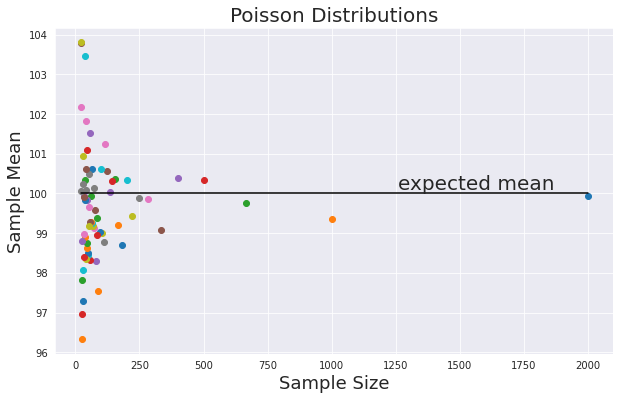

In [17]:
#Create the axes for the plot
ax_pois_limit = pl.figure(figsize = (10, 6)).add_subplot(111)
means['pois'] = {}

for i in mydist['pois']:
  temp = mydist['pois'][i].mean()
  means['pois'][i] = temp
  ax_pois_limit.plot(i,temp, 'o')

ax_pois_limit.set_xlabel('Sample Size', fontsize=18)
ax_pois_limit.set_ylabel('Sample Mean', fontsize=18)
ax_pois_limit.set_title('Poisson Distributions', fontsize=20)
ax_pois_limit.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
ax_pois_limit.text(ax_pois_limit.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

#Figure 7: Sample mean based on sample size for Poisson Distributions. Similar range of sample means to the chi-squared distribution, however the sample means converge slightly more gradually toward the expected means. Sample means remain somewhat variable up to and above 500 samples. 

**Now, let's see the histogram of all means for the Poisson Distribution**


We will add a gaussian fit for the curve

[ 6.04203036 99.58969737  1.07039972]


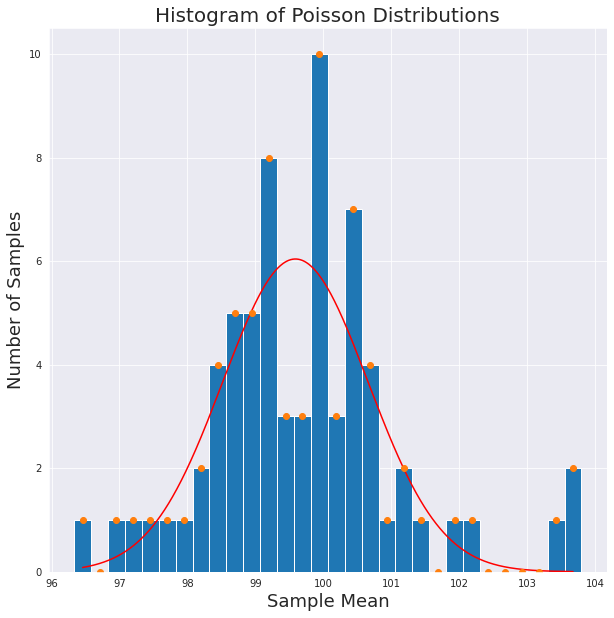

In [18]:
pois_means = list(means['pois'].values())

ax_hist_pois = pl.figure(figsize = (10, 10)).add_subplot(111)
pois_hist = ax_hist_pois.hist(pois_means,bins=30)
ax_hist_pois.set_xlabel('Sample Mean', fontsize = 18)
ax_hist_pois.set_ylabel('Number of Samples', fontsize = 18)
ax_hist_pois.set_title('Histogram of Poisson Distributions',fontsize=20)

#let's find the center of each bin
#since we have a small amount of bins, lets do it using a for cycle
x_pois_fit = np.zeros(pois_hist[1].size-1)
for i in np.arange(0,pois_hist[1].size-1):
  x_pois_fit[i] = (pois_hist[1][i]+pois_hist[1][i+1])/2

#Fittign the gaussian curve
a, b = optimize.curve_fit(gaussian, x_pois_fit, pois_hist[0], p0 = [10,110,4])
x_pois = np.linspace(max(x_pois_fit),min(x_pois_fit),1000)
y_pois_fit = gaussian(x_pois, a[0], a[1], a[2])
print(a)
ax_hist_pois.plot(x_pois, y_pois_fit, c = 'r', label = 'fit')
ax_hist_pois.plot(x_pois_fit,pois_hist[0],'o')

# Figure 8: Histogram of poisson distributions. From the histogram, we can see that most distributions have mean around the population mean. Fitting a Gaussian curve allows us to see that the distribtion of sample means is wider than those found in the normal distribution.

# Do it for the Binomial distribution

Text(1259.3999999999999, 100, 'expected mean')

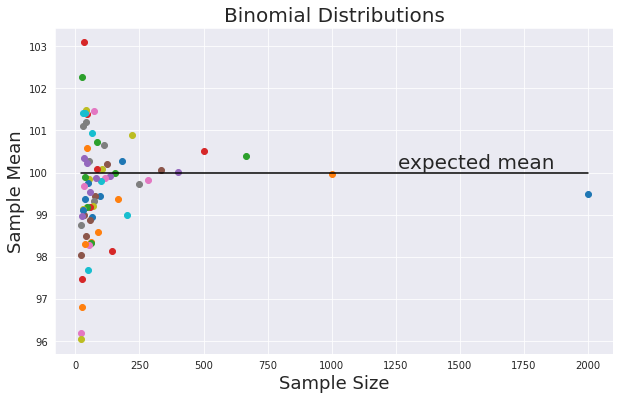

In [19]:
#Create the axes for the plot
ax_binomial_limit = pl.figure(figsize = (10, 6)).add_subplot(111)
means['binomial'] = {}

for i in mydist['binomial']:
  temp = mydist['binomial'][i].mean()
  means['binomial'][i] = temp
  ax_binomial_limit.plot(i,temp, 'o')

ax_binomial_limit.set_xlabel('Sample Size', fontsize=18)
ax_binomial_limit.set_ylabel('Sample Mean', fontsize=18)
ax_binomial_limit.set_title('Binomial Distributions', fontsize=20)
ax_binomial_limit.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
ax_binomial_limit.text(ax_binomial_limit.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

#Figure 9: The sample means in comparison with sample size in the binomial distributions show the most similarity with chi-squared distributions. As with all other distributions, the law of large numbers shows sample means approaching the expected mean as sample size increases. The sample means become relatively close (within 1) to the expected mean around a sample size of 250

**Now, let's see the histogram of all means for the Binomial Distribution**


We will add a gaussian fit for the curve

[ 5.90817376 99.75988409  1.02808838]


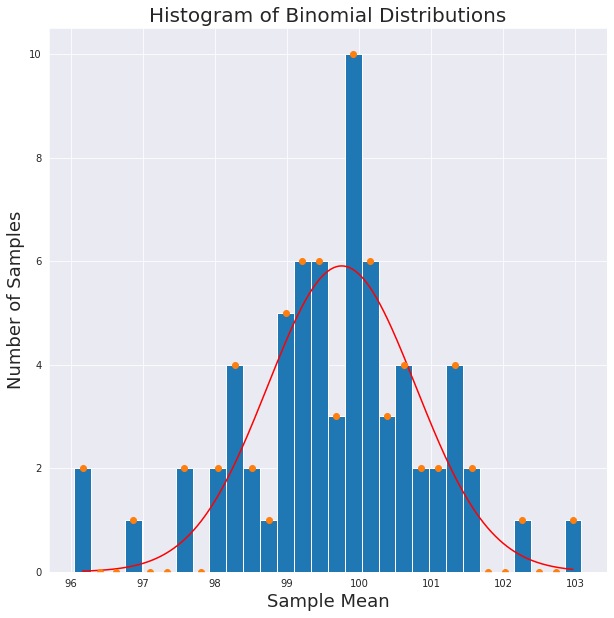

In [20]:
binomial_means = list(means['binomial'].values())

ax_hist_binomial = pl.figure(figsize = (10, 10)).add_subplot(111)
binomial_hist = ax_hist_binomial.hist(binomial_means,bins=30)
ax_hist_binomial.set_xlabel('Sample Mean', fontsize = 18)
ax_hist_binomial.set_ylabel('Number of Samples', fontsize = 18)
ax_hist_binomial.set_title('Histogram of Binomial Distributions',fontsize=20)

#let's find the center of each bin
#since we have a small amount of bins, lets do it using a for cycle
x_binomial_fit = np.zeros(binomial_hist[1].size-1)
for i in np.arange(0,binomial_hist[1].size-1):
  x_binomial_fit[i] = (binomial_hist[1][i]+binomial_hist[1][i+1])/2

#Fittign the gaussian curve
#p0 is the starting point for the fit_curve function
a, b = optimize.curve_fit(gaussian, x_binomial_fit, binomial_hist[0], p0 = [10,110,4])
#Print the parameters fitted
print(a)

x_binomial = np.linspace(max(x_binomial_fit),min(x_binomial_fit),1000)
y_binomial_fit = gaussian(x_binomial, a[0], a[1], a[2])

ax_hist_binomial.plot(x_binomial, y_binomial_fit, c = 'r', label = 'fit')
ax_hist_binomial.plot(x_binomial_fit,binomial_hist[0],'o')

#Figure 10: Histogram of Binomial distributions. General gaussian shape, with a range of means similar to the poisson distribution.

# Do it for another distribution

In this case, we chose the Gamma Distribution

Text(1259.3999999999999, 100, 'expected mean')

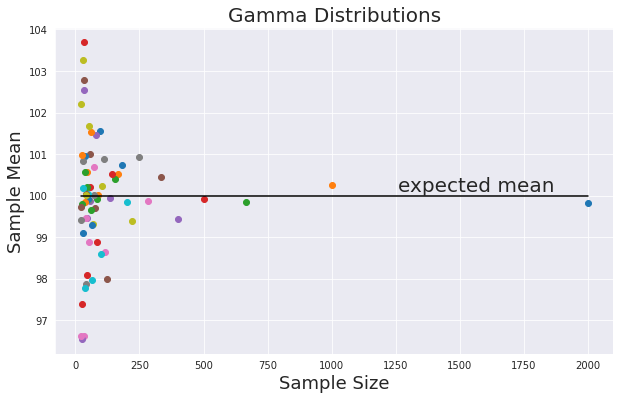

In [21]:
#Create the axes for the plot
ax_gamma_limit = pl.figure(figsize = (10, 6)).add_subplot(111)
means['gamma'] = {}

for i in mydist['gamma']:
  temp = mydist['gamma'][i].mean()
  means['gamma'][i] = temp
  ax_gamma_limit.plot(i,temp, 'o')

ax_gamma_limit.set_xlabel('Sample Size', fontsize=18)
ax_gamma_limit.set_ylabel('Sample Mean', fontsize=18)
ax_gamma_limit.set_title('Gamma Distributions', fontsize=20)
ax_gamma_limit.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
ax_gamma_limit.text(ax_gamma_limit.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

#Figure 11: The gamma distributions exhibit a similar trend in variation of sample means based on sample size to each other the past distributions, with a similar range of sample means to those found in the binomial and poisson distributions.

**Now, let's see the histogram of all means for the Gamma Distribution**


We will add a gaussian fit for the curve

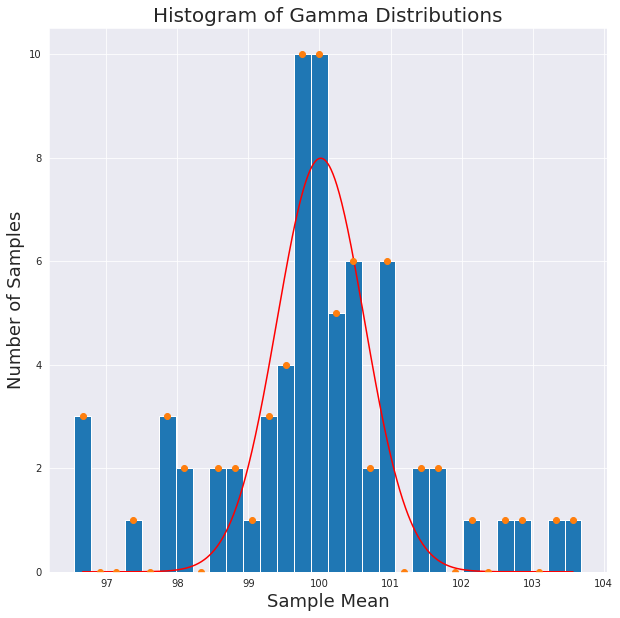

In [22]:
gamma_means = list(means['gamma'].values())

ax_hist_gamma = pl.figure(figsize = (10, 10)).add_subplot(111)
gamma_hist = ax_hist_gamma.hist(gamma_means,bins=30)
ax_hist_gamma.set_xlabel('Sample Mean', fontsize = 18)
ax_hist_gamma.set_ylabel('Number of Samples', fontsize = 18)
ax_hist_gamma.set_title('Histogram of Gamma Distributions',fontsize=20)

#let's find the center of each bin
#since we have a small amount of bins, lets do it using a for cycle
x_gamma_fit = np.zeros(gamma_hist[1].size-1)
for i in np.arange(0,gamma_hist[1].size-1):
  x_gamma_fit[i] = (gamma_hist[1][i]+gamma_hist[1][i+1])/2

#Fittign the gaussian curve
a, b = optimize.curve_fit(gaussian, x_gamma_fit, gamma_hist[0], p0 = [10,110,4])
x_gamma = np.linspace(max(x_gamma_fit),min(x_gamma_fit),1000)
y_gamma_fit = gaussian(x_gamma, a[0], a[1], a[2])

ax_hist_gamma.plot(x_gamma, y_gamma_fit, c = 'r', label = 'fit')
ax_hist_gamma.plot(x_gamma_fit,gamma_hist[0],'o')

#Figure 12: Histogram of gamma distributions. This histogram and the Gaussian fit show a slightly narrower distribution than the binomial distributions, and some more outliers particularly on the left end of the curve.

#Comments: We found that the law of large numbers held true for every one of the distributions that we tested here. Additionally, the histograms showing the frequency of means showed a Gaussian looking distribution no matter which distrution it was. 

# 661 students: fita  a Gaussian to the histogram of the means for each distribution

#Gaussian fits are embedded in code for each of the distributions. 

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram. 
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

(array([ 1.,  1.,  1.,  1.,  0.,  2.,  1.,  0.,  2.,  1.,  2.,  4.,  5.,
        13.,  3.,  6.,  8.,  2.,  5.,  3.,  3.,  3.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 94.67091516,  95.05270456,  95.43449395,  95.81628335,
         96.19807274,  96.57986214,  96.96165154,  97.34344093,
         97.72523033,  98.10701972,  98.48880912,  98.87059852,
         99.25238791,  99.63417731, 100.0159667 , 100.3977561 ,
        100.7795455 , 101.16133489, 101.54312429, 101.92491369,
        102.30670308, 102.68849248, 103.07028187, 103.45207127,
        103.83386067, 104.21565006, 104.59743946, 104.97922885,
        105.36101825, 105.74280765, 106.12459704]),
 <a list of 30 Patch objects>)

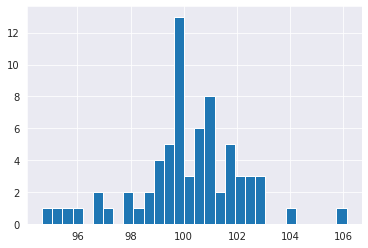

In [23]:
pl.hist(allmeans,bins=30)

And you can create your own Gaussian function to pass to curve_fit as this for example: 

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)